# lead scoring



In [1]:
#importing all the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#importing data set


In [3]:
lead_df=pd.read_csv("leads.csv")

In [4]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking the shape of imported dataset
lead_df.shape


(9240, 37)

In [6]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#we will now find the number of unique values in each column if len(column)= unique value we can delete that column

In [9]:
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
#we will delete the column having only one unique value because it would add skewness in our model building
unique_values= lead_df.columns[lead_df.nunique()==1]
unique_values

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [11]:
lead_df.drop(labels= unique_values,axis='columns',inplace=True) 

In [12]:
# dropping lead number  and prospect id because of all unique values


In [13]:
lead_df.drop(['Prospect ID','Lead Number'], axis=1,inplace=True)

In [14]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [15]:
# it is given that select in some categorical could mean that it is a null value so lets convert it.
lead_df.replace('Select',np.nan,inplace=True)

In [16]:
#lets check if it worked
lead_df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
#checking for missing values percentage

In [18]:
round(lead_df.isnull().sum()/len(lead_df)*100, 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Lead Origi

In [19]:
#lead profile has 74 percentage missing value so the entire column should be removed
#lead quality also has significant amount of missing values so the column is to be removed

#droppping columns having more than 30% missing values
null_value1= lead_df.isnull().sum()*100/len(lead_df)
null_value1=null_value1[null_value1.values>30.00]
null_value1.sort_values(ascending=False)





How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
City                                  39.707792
Specialization                        36.580087
Tags                                  36.287879
dtype: float64

In [20]:
#dropping all the columns having huge null values
lead_df.drop(labels=null_value1.index,axis='columns',inplace=True)

In [21]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [22]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [23]:
lead_df.shape

(9240, 20)

In [24]:
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
A free copy of Mastering The

In [25]:
unique_columns = lead_df.columns[lead_df.nunique()>0]
unique_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [26]:
#writin a loop to find all the uniques values of each column of the data set
for i in unique_columns:
    x = lead_df[i].value_counts(normalize=True)
    print(f'The unique values in {i} is', '\n')
    print(x,'\n')
    print('-'*100,'\n')

The unique values in Lead Origin is 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64 

---------------------------------------------------------------------------------------------------- 

The unique values in Lead Source is 

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_ED

In [27]:
# Starting from the above we will make changes in the lead source because Google and google are the same
lead_df['Lead Source'].replace('google','Google',inplace=True)

In [28]:
round(100*(lead_df.isnull().sum()/len(lead_df)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Lead Origin                                       0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Ema

In [29]:
#(lead source,TotalVisits,Page Views Per Visit, 'Last Activity) has some missing values we will replace them with mode 
lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0],inplace=True)

lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].mode()[0],inplace=True)

lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].mode()[0],inplace=True)

lead_df['Last Activity'].fillna(lead_df['Last Activity'].mode()[0],inplace=True)

In [30]:
round(100*(lead_df.isnull().sum()/len(lead_df)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Last Activity                                     0.00
Page Views Per Visit                              0.00
Total Time Spent on Website                       0.00
TotalVisits                                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Ema

In [31]:
#imputing values of others

lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [32]:
#India seems to be the most common value so we are going to impute value 'India' for null values using mode

lead_df['Country'].fillna(lead_df['Country'].mode()[0],inplace=True)

#this is also very repeating values to we might have to drop country in future

In [33]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
#imputing the missing value with the most common used value

lead_df['What is your current occupation'].fillna(lead_df['What is your current occupation'].mode()[0],inplace=True)

In [35]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
#imputing the missing value with the most common used value

lead_df['What matters most to you in choosing a course'].fillna(lead_df['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [37]:
#final check if there are any more missing values

round(100*(lead_df.isnull().sum()/len(lead_df)), 2).sort_values(ascending=False)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                        0.0
Do Not Call                                      0.0
Do Not Email                                  

In [38]:
#All null values are dealt with  now we have to proceed

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [39]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [40]:
#deleting more columns based on the total  numbervalues i.e. skewness

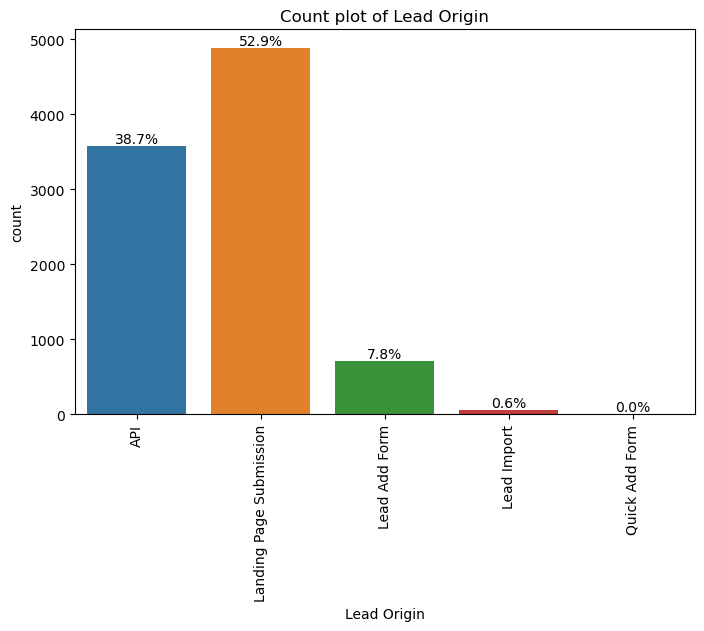

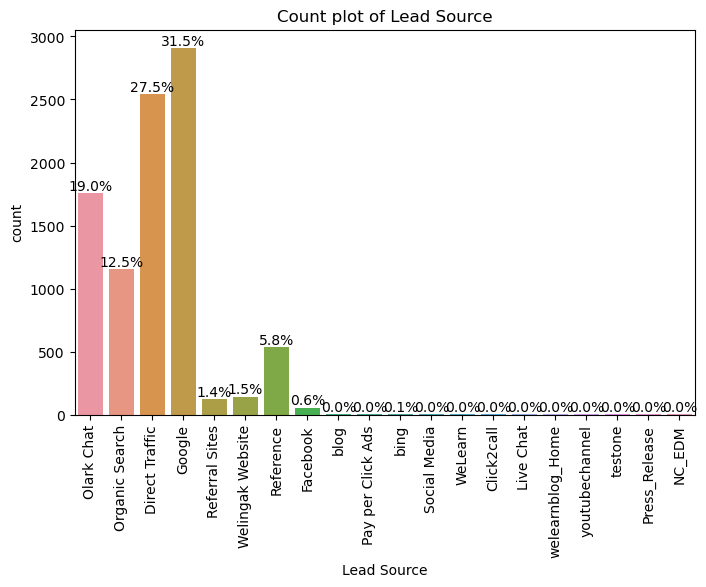

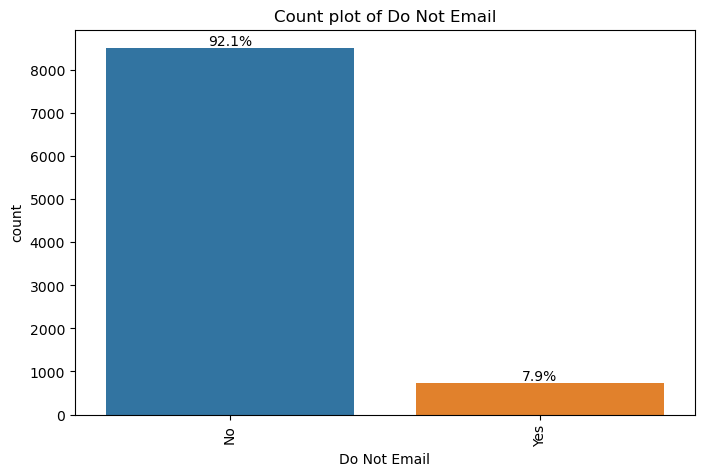

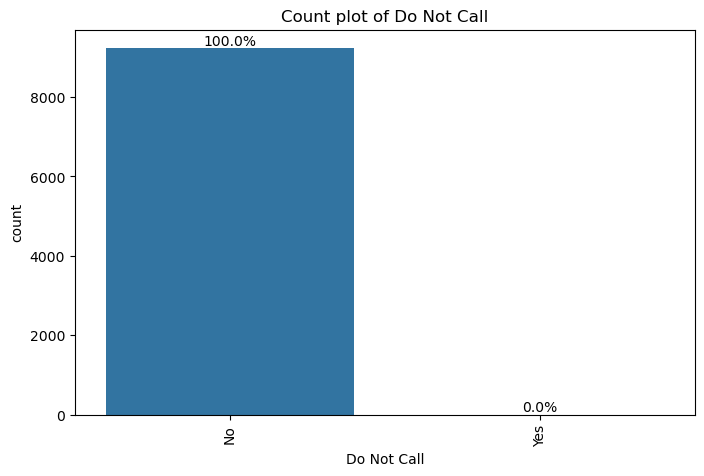

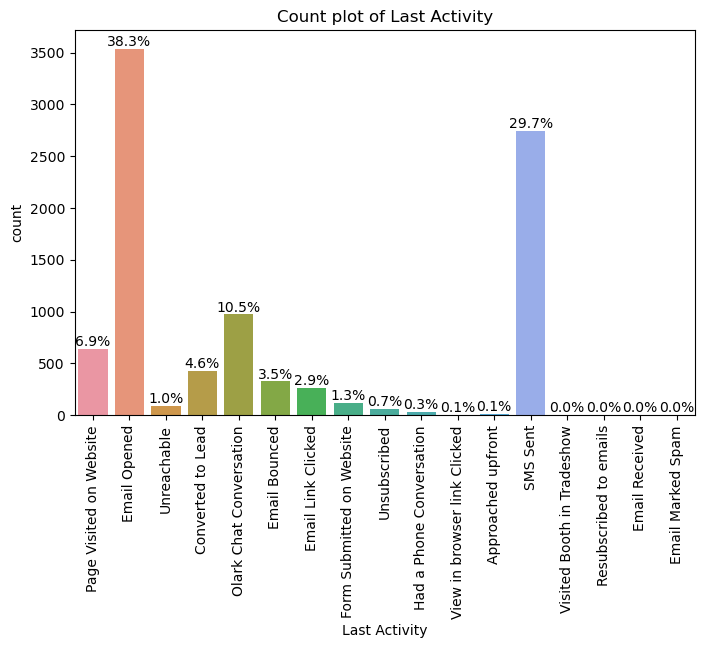

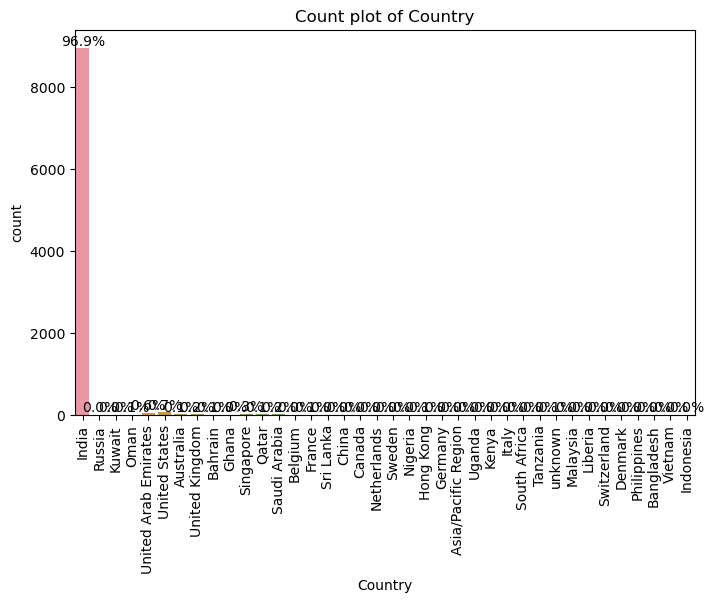

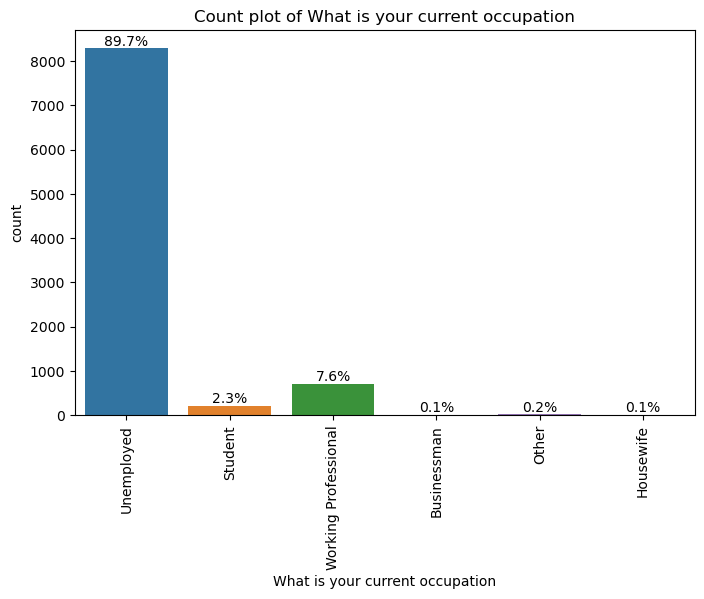

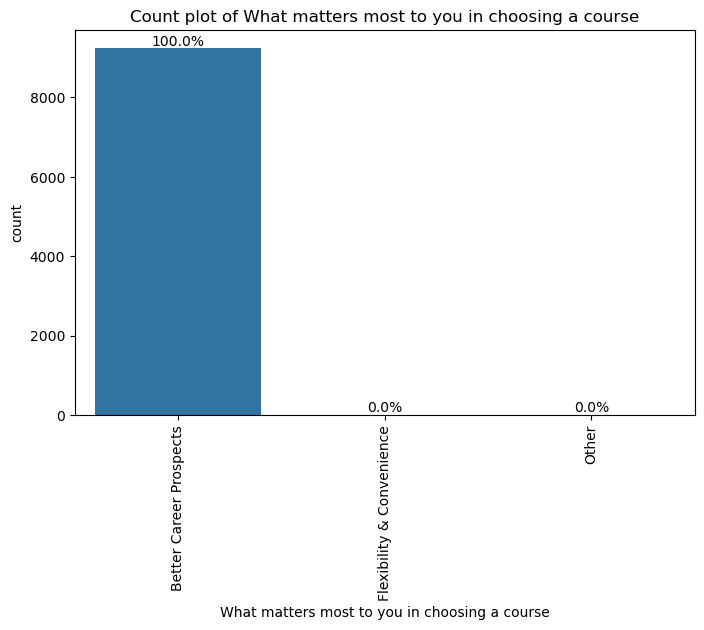

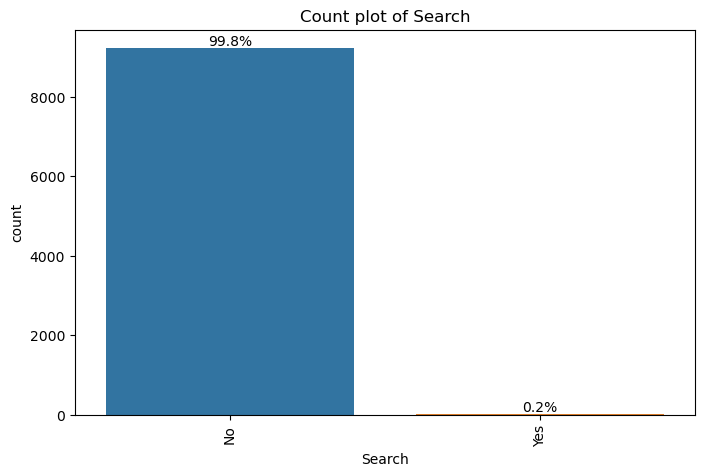

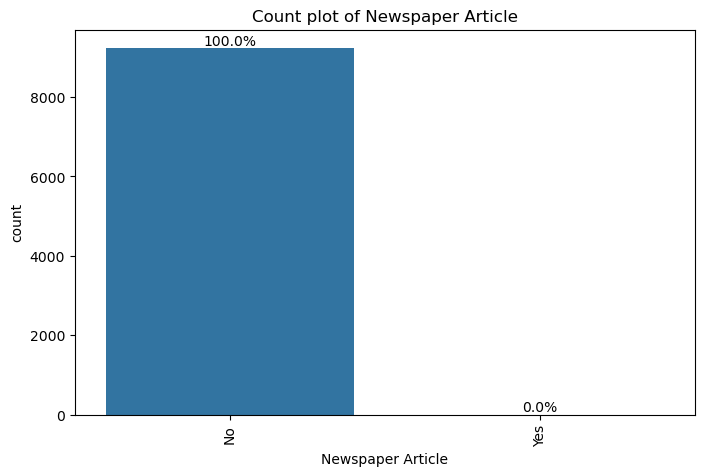

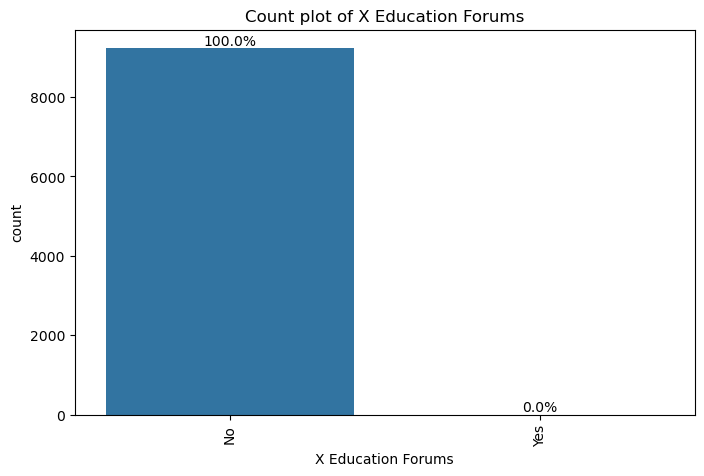

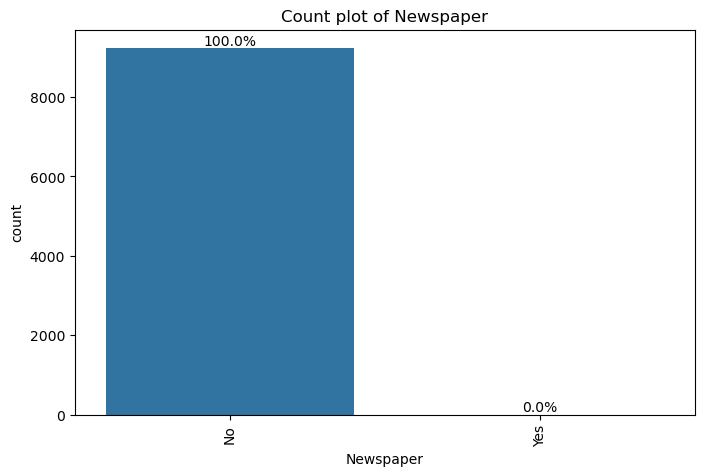

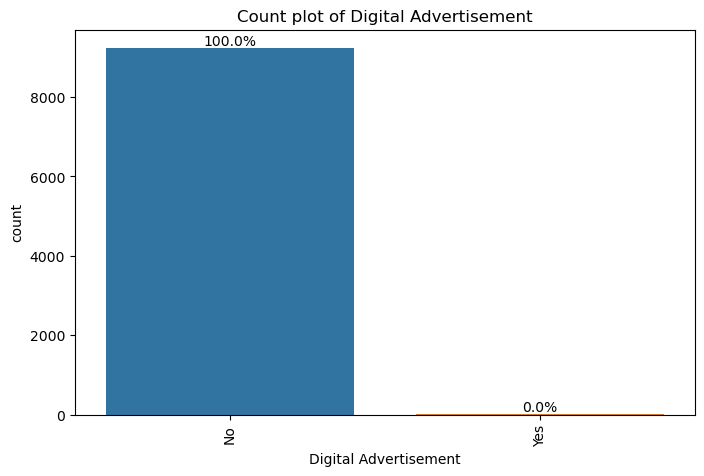

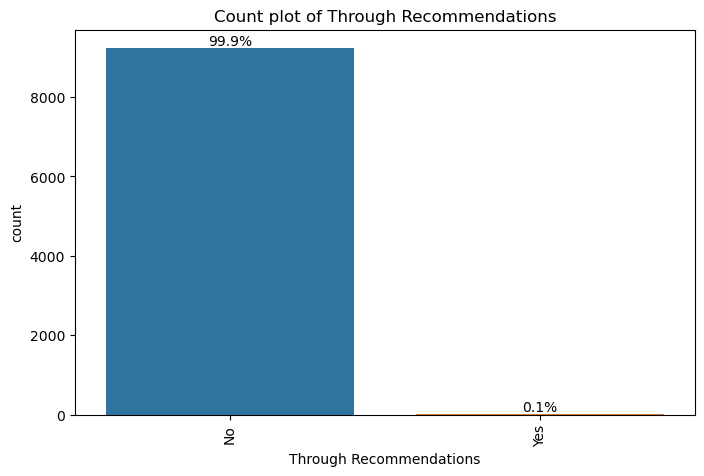

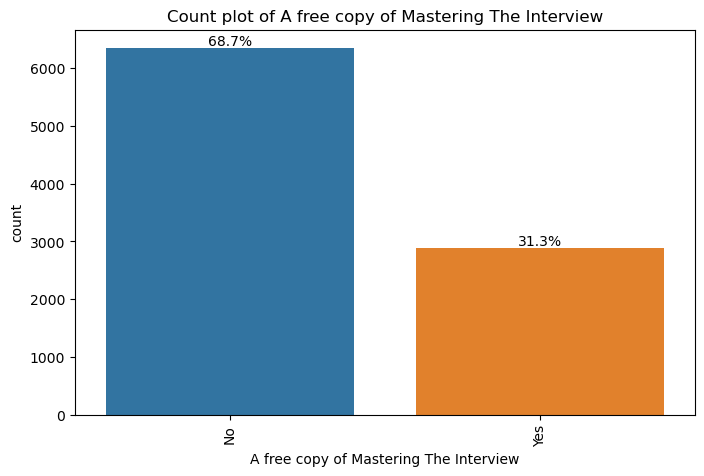

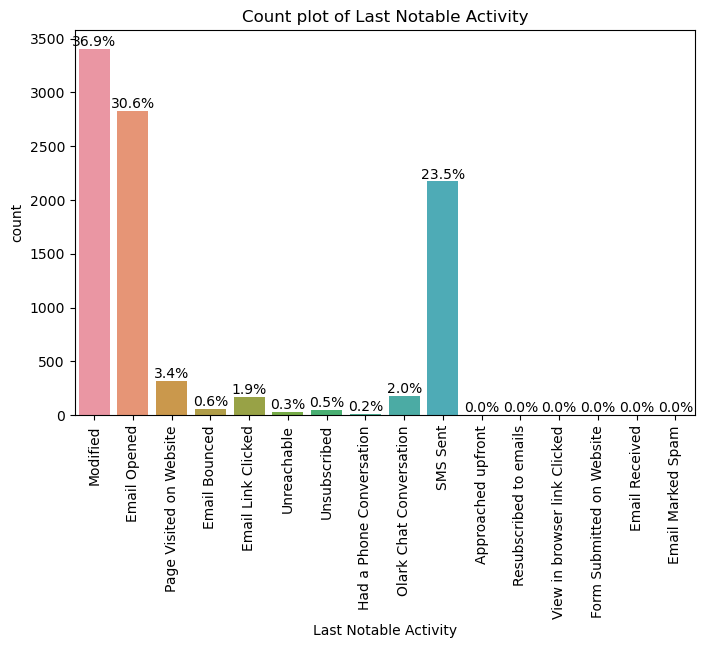

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [41]:
columns_list = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()

for i in columns_list[:]:
    plt.figure(figsize = [8,5])
    plt.title(f"Count plot of {i}")
    plot = sns.countplot(x=i, data=lead_df)
    plt.xticks(rotation=90)
    for p in plot.patches:
        text = '{:.1f}%'.format(100*p.get_height()/len(lead_df[i]))
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        plot.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
plt.show()
print(columns_list)

In [42]:
# here we can see that there is so much data that is very much skewed and it can ruin our model so we will delete them


lead_df.drop(['Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Search','What matters most to you in choosing a course','Do Not Call'],axis=1,inplace=True)

In [43]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,Modified


In [44]:
lead_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


## EDA

<Axes: >

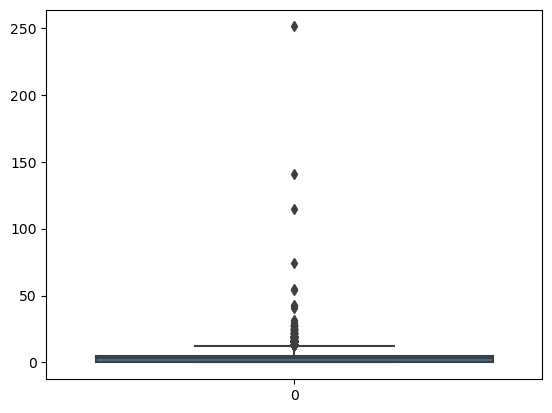

In [45]:
#OUTLIERS
sns.boxplot(lead_df['TotalVisits'])

<Axes: >

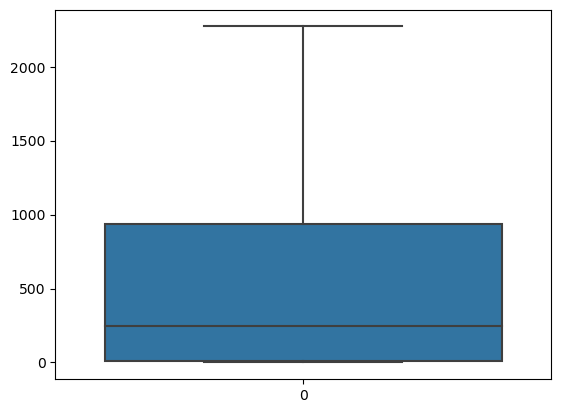

In [46]:
sns.boxplot(lead_df['Total Time Spent on Website'])

<Axes: >

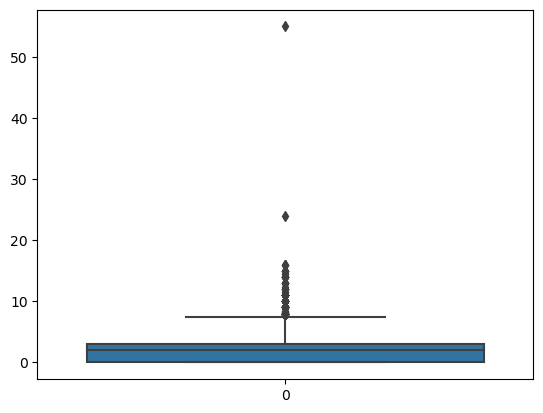

In [47]:
sns.boxplot(lead_df['Page Views Per Visit'])


In [48]:
#OBSERVATIONS

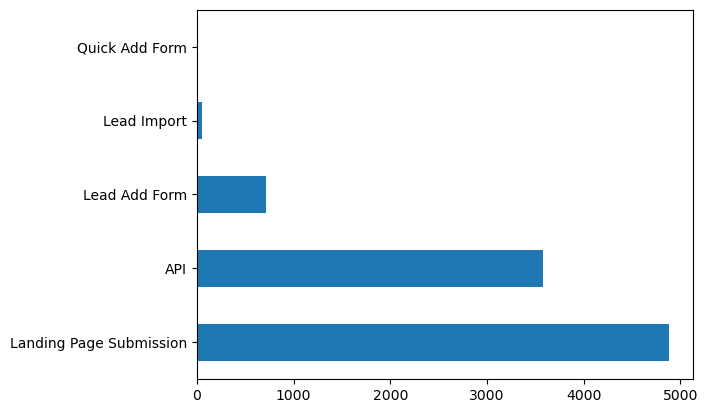

In [49]:
# UNIVARIATE ANALYSIS 
lead_df["Lead Origin"].value_counts().plot.barh()
plt.show()



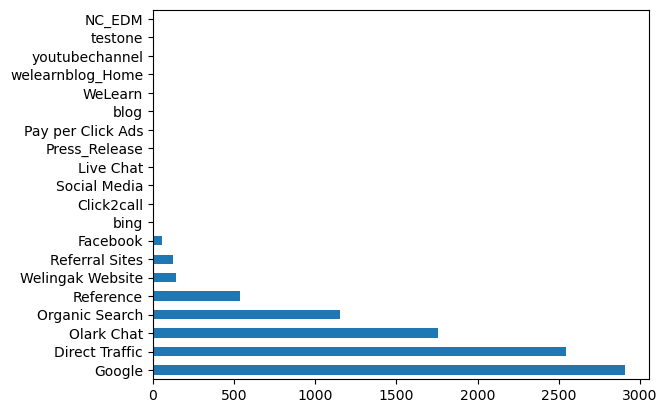

In [50]:
lead_df["Lead Source"].value_counts().plot.barh()
plt.show()

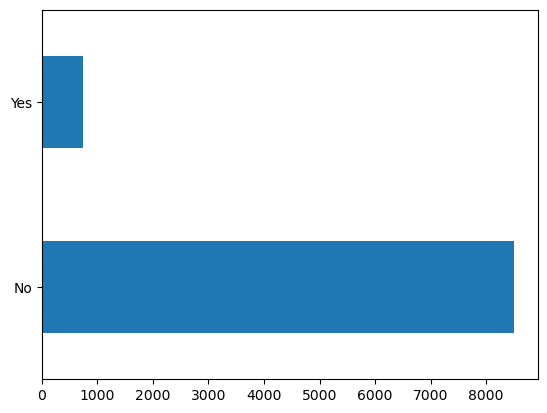

In [51]:
lead_df["Do Not Email"].value_counts().plot.barh()
plt.show()

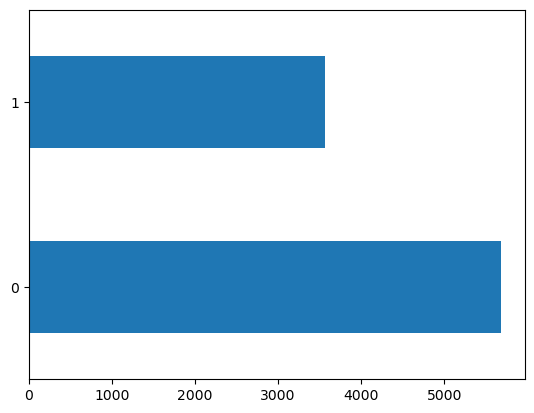

In [52]:
#checking data imbalance


lead_df["Converted"].value_counts().plot.barh()
plt.show()

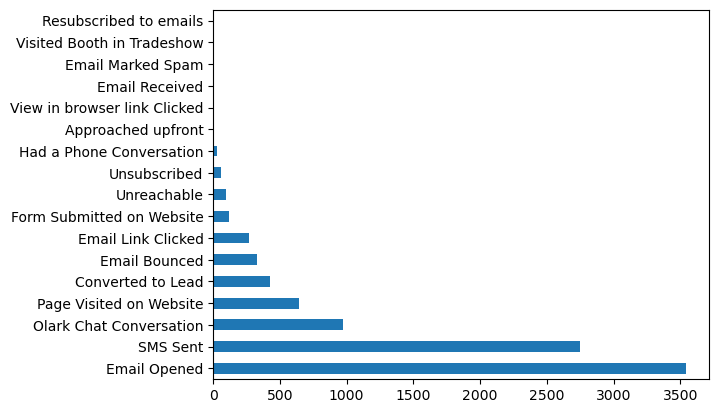

In [53]:

lead_df["Last Activity"].value_counts().plot.barh()
plt.show()

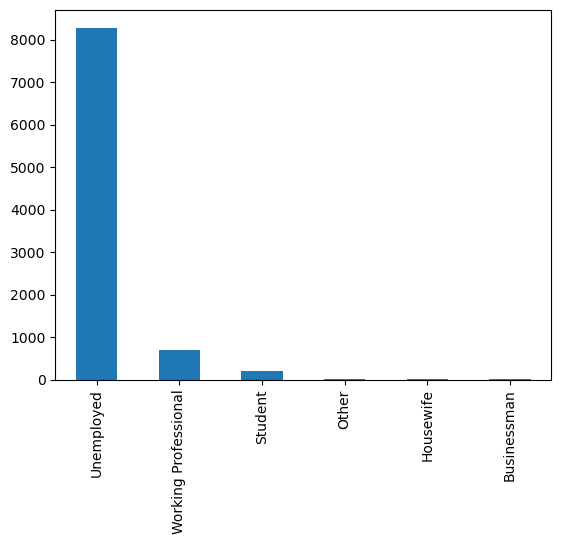

In [54]:

lead_df["What is your current occupation"].value_counts().plot.bar()
plt.show()

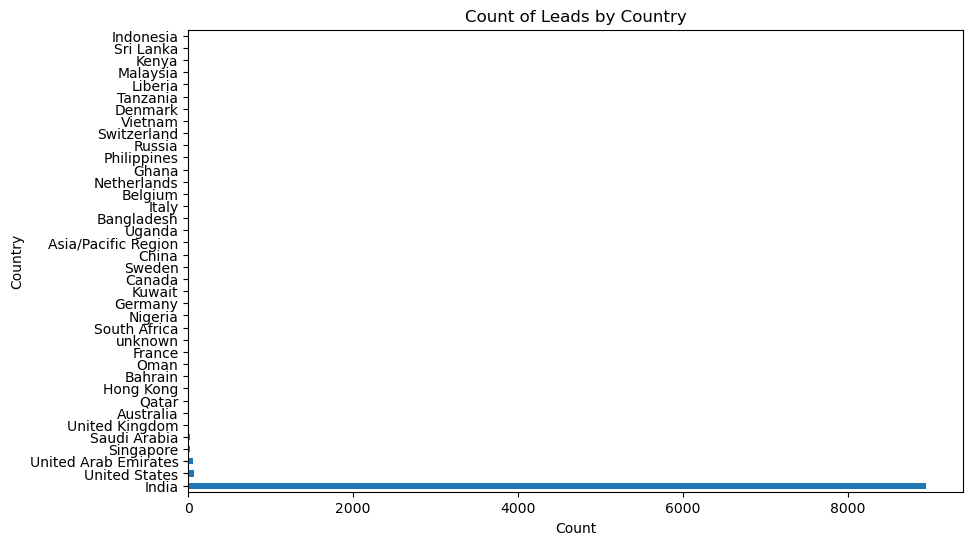

In [55]:
plt.figure(figsize=(10, 6))
lead_df["Country"].value_counts().plot.barh()
plt.title("Count of Leads by Country")
plt.xlabel("Count")
plt.ylabel("Country")

plt.show()

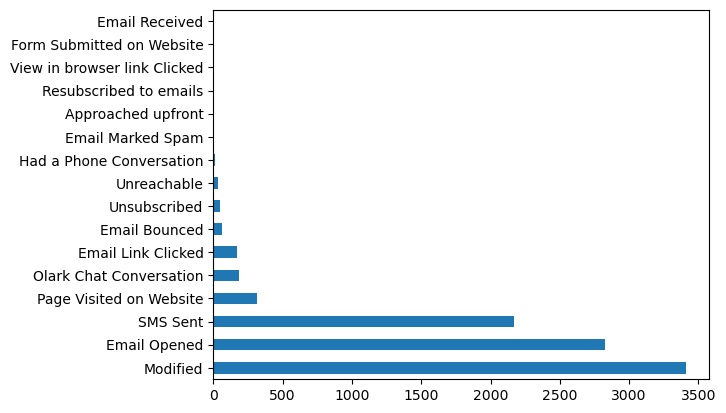

In [56]:
lead_df["Last Notable Activity"].value_counts().plot.barh()
plt.show()

In [57]:
#Bivariate analysis


<Figure size 1000x600 with 0 Axes>

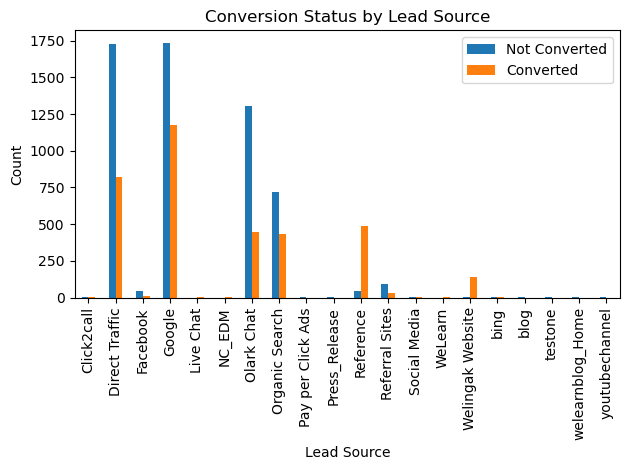

In [58]:
plt.figure(figsize=(10, 6))
graph1 = lead_df.groupby(by="Lead Source")["Converted"].value_counts()
graph1 = graph1.unstack().fillna(0)
graph1.plot.bar()  # Use the custom palette or palette name

plt.title("Conversion Status by Lead Source")
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.legend(["Not Converted", "Converted"])

plt.tight_layout()
plt.show()

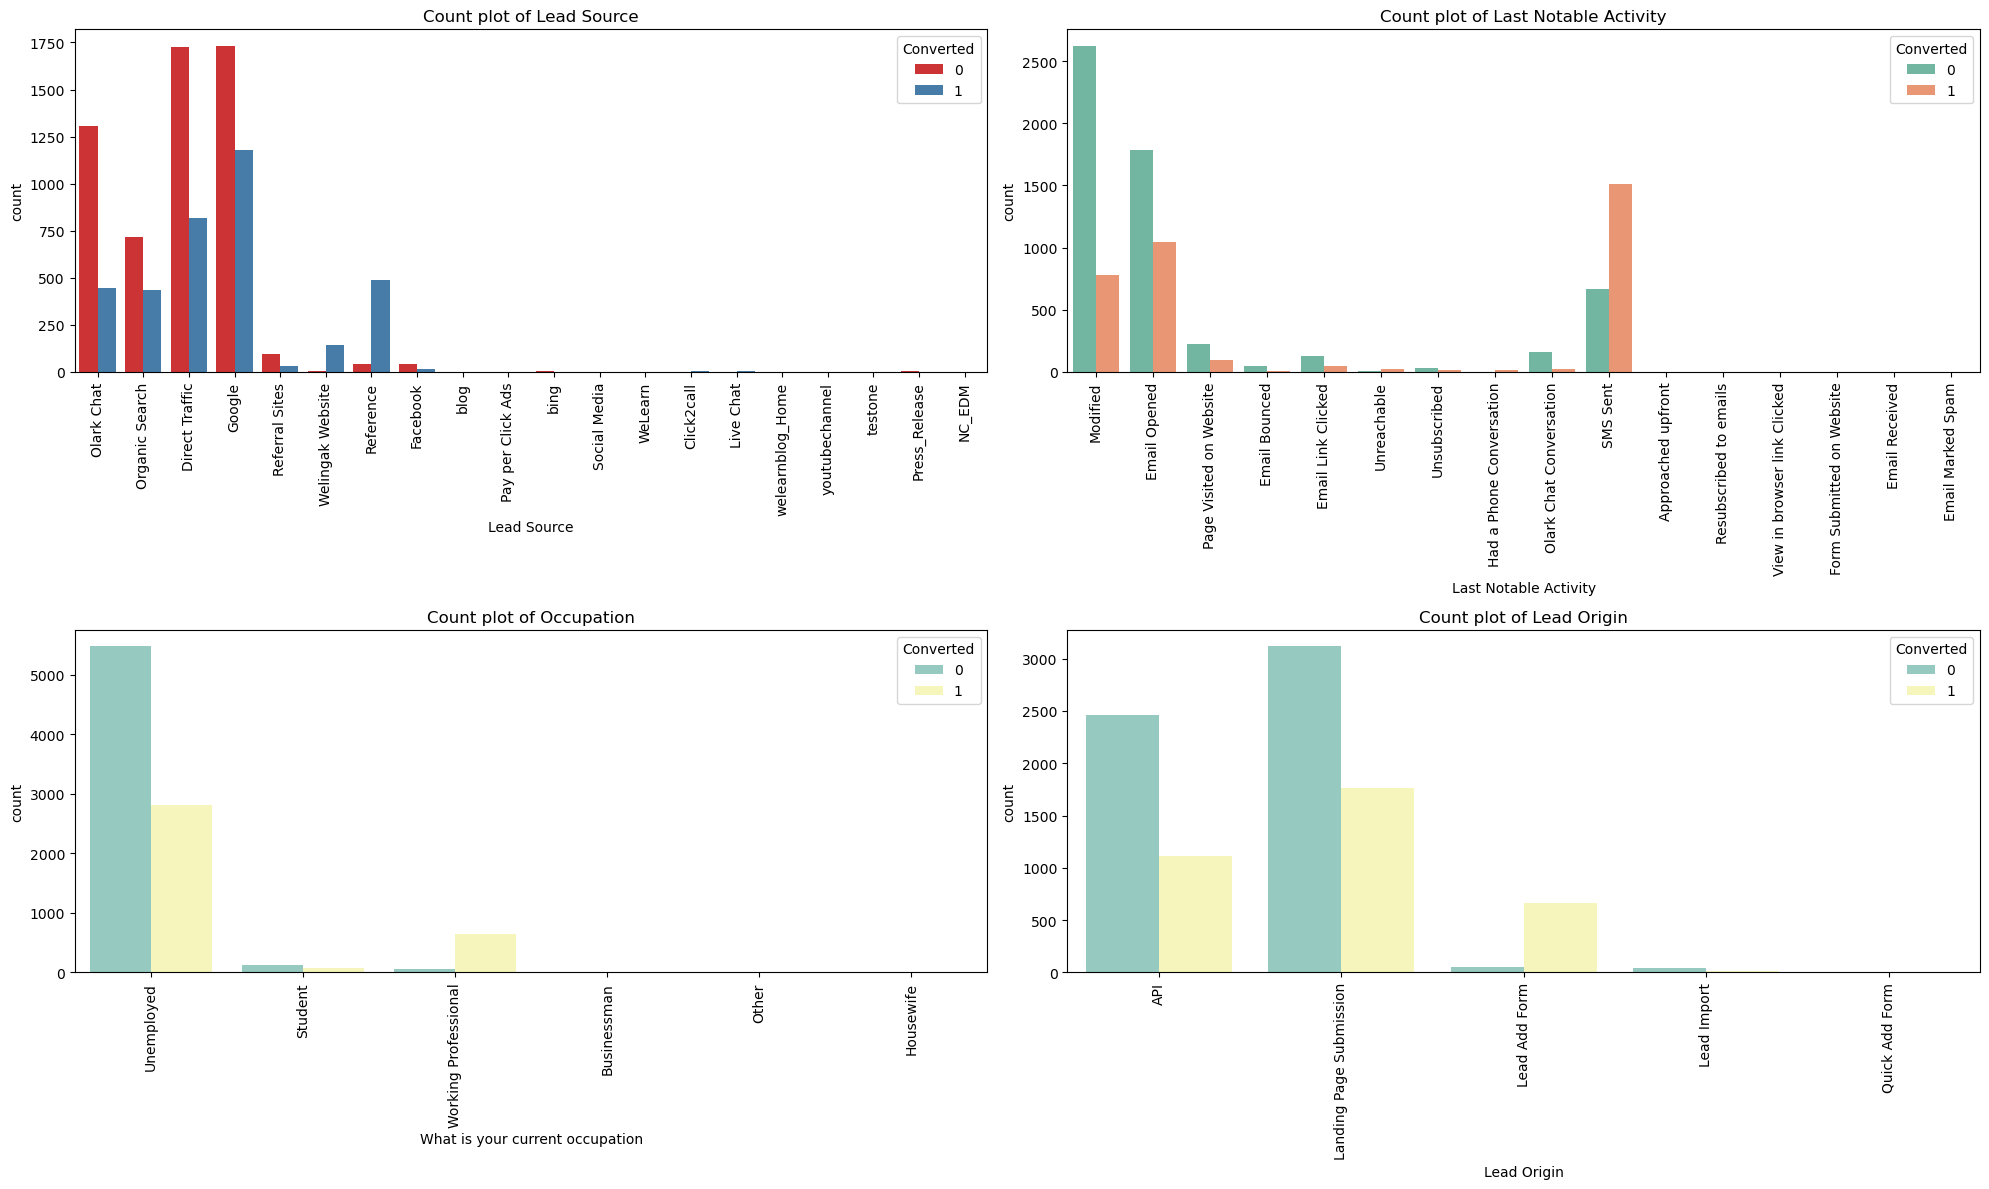

In [59]:

plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
ax1 = sns.countplot(x='Lead Source', data=lead_df, hue='Converted', palette='Set1')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Count plot of Lead Source')

plt.subplot(2, 2, 2)
ax2 = sns.countplot(x='Last Notable Activity', data=lead_df, hue='Converted', palette='Set2')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.title('Count plot of Last Notable Activity')

plt.subplot(2, 2, 3)
ax3 = sns.countplot(x='What is your current occupation', data=lead_df, hue='Converted', palette='Set3')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.title('Count plot of Occupation')

plt.subplot(2, 2, 4)
ax4 = sns.countplot(x='Lead Origin', data=lead_df, hue='Converted', palette='Set3')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.title('Count plot of Lead Origin')

plt.tight_layout()
plt.show()

In [60]:
#multivariate analysis

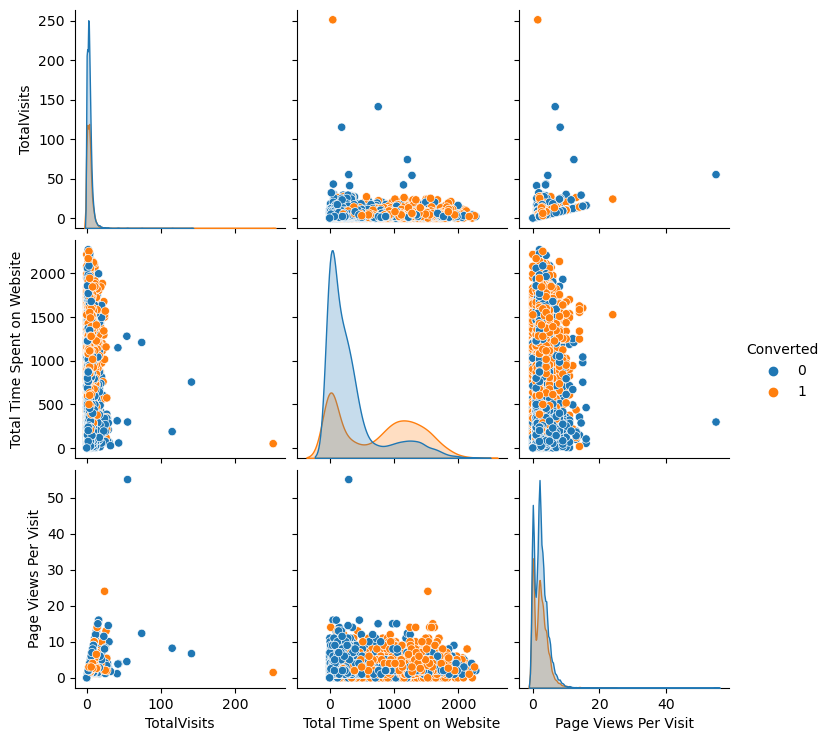

In [61]:
sns.pairplot(lead_df,hue = "Converted")

In [62]:
# changing yes and no to 1s and 0s

In [63]:
def binaryconvert(df):
    df = df.replace({'Yes': 1, 'No': 0})
    return df

In [64]:
lead_df1=binaryconvert(lead_df)

In [65]:
lead_df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,Modified


In [66]:
#converting all categorical variables into dummies
#checking  percentages of different variables

100*(lead_df1['Lead Origin'].value_counts()/len(lead_df))

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [67]:
#checking if the we can merge other small options into one
most_leads = 100*(lead_df1['Lead Source'].value_counts()/len(lead_df))<5
print(most_leads)

Google               False
Direct Traffic       False
Olark Chat           False
Organic Search       False
Reference            False
Welingak Website      True
Referral Sites        True
Facebook              True
bing                  True
Click2call            True
Social Media          True
Live Chat             True
Press_Release         True
Pay per Click Ads     True
blog                  True
WeLearn               True
welearnblog_Home      True
youtubechannel        True
testone               True
NC_EDM                True
Name: Lead Source, dtype: bool


In [68]:
#no need for any merging for this case

toconvert = lead_df1['Lead Source'].value_counts()[most_leads].index.tolist()

lead_df1.loc[lead_df1['Lead Source'].isin(toconvert), 'Lead Source'] = 'OtherLeads'


In [69]:
#merging all below 5% to OtherLeadSource

lead_df1['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
OtherLeads         345
Name: Lead Source, dtype: int64

In [70]:
#to check the total percentage of the value counts

100*(lead_df1['Last Activity'].value_counts()/len(lead_df))

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [71]:
#merging all below 10 to OtherLastActivity


toconvert = lead_df1['Last Activity'].value_counts()[100*(lead_df1['Last Activity'].value_counts()/len(lead_df)) < 5].index.tolist()

lead_df1.loc[lead_df1['Last Activity'].isin(toconvert), 'Last Activity'] = 'OtherLastActivity'


In [72]:

100*(lead_df1['Last Activity'].value_counts()/len(lead_df))

Email Opened               38.311688
SMS Sent                   29.707792
OtherLastActivity          14.523810
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Name: Last Activity, dtype: float64

In [73]:

100*(lead_df1['Country'].value_counts()/len(lead_df))

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [74]:
toconvert = lead_df1['Country'].value_counts()[100*(lead_df1['Country'].value_counts()/len(lead_df)) < 1].index.tolist()

lead_df1.loc[lead_df1['Country'].isin(toconvert), 'Country'] = 'OtherCountries'

In [75]:
100*(lead_df1['Country'].value_counts()/len(lead_df))

India             96.893939
OtherCountries     3.106061
Name: Country, dtype: float64

In [76]:

100*(lead_df1['What is your current occupation'].value_counts()/len(lead_df))

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [77]:
toconvert = lead_df1['What is your current occupation'].value_counts()[100*(lead_df1['What is your current occupation'].value_counts()/len(lead_df)) < 1].index.tolist()

lead_df1.loc[lead_df1['What is your current occupation'].isin(toconvert), 'What is your current occupation'] = 'OtherOccupation'

In [78]:
100*(lead_df1['What is your current occupation'].value_counts()/len(lead_df))

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
OtherOccupation          0.367965
Name: What is your current occupation, dtype: float64

In [79]:
lead_df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,OtherLastActivity,India,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,OtherLastActivity,India,Unemployed,0,Modified


In [80]:
100*(lead_df1['Last Notable Activity'].value_counts()/len(lead_df))

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [81]:
toconvert = lead_df1['Last Notable Activity'].value_counts()[100*(lead_df1['Last Notable Activity'].value_counts()/len(lead_df)) < 5].index.tolist()

lead_df1.loc[lead_df1['Last Notable Activity'].isin(toconvert), 'Last Notable Activity'] = 'Other'

In [82]:
100*(lead_df1['Last Notable Activity'].value_counts()/len(lead_df))

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Other            9.025974
Name: Last Notable Activity, dtype: float64

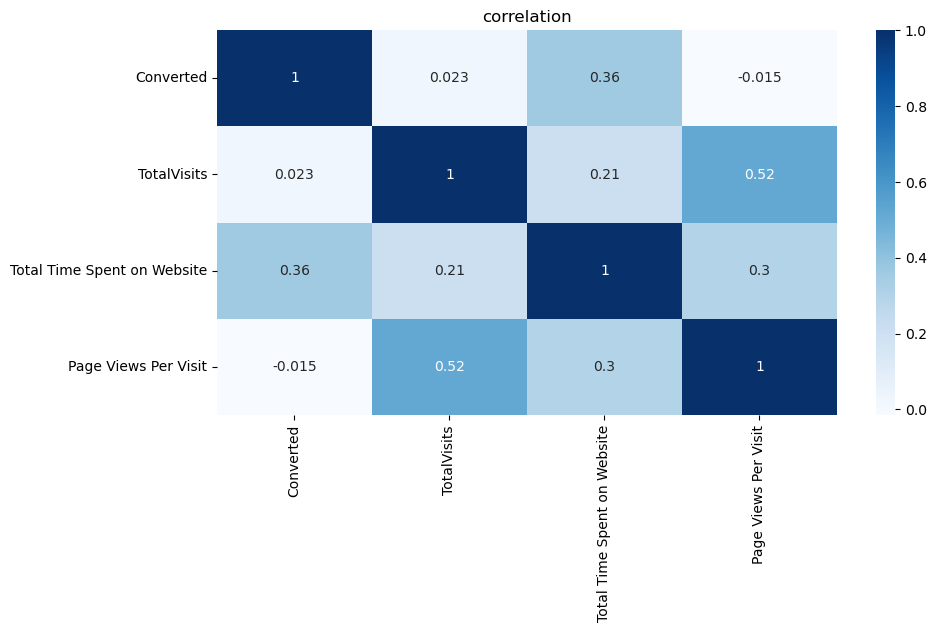

In [83]:
plt.figure(figsize=(10,5)) 
sns.heatmap(lead_df.corr(), annot=True, cmap="Blues").set(title='correlation')
plt.show()

In [84]:
#####################

## Dummy Variable

In [85]:
#checking the dataset
lead_df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,OtherLastActivity,India,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,OtherLastActivity,India,Unemployed,0,Modified


In [86]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

In [87]:
#for convinience
lead_df1.rename(columns={'What is your current occupation':'Occupation'},inplace=True)

In [88]:
#converting categorical into dummies
dummy=pd.get_dummies(lead_df1[['Lead Origin','Lead Source','Last Activity','Country','Occupation','Last Notable Activity']],drop_first=True)

In [89]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_OtherLeads,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_OtherLastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_OtherCountries,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [90]:
#merging the two dataset one of which is original and one is dummy
lead_df1=pd.concat([lead_df1,dummy],axis=1)

In [91]:
lead_df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_OtherLeads,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_OtherLastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_OtherCountries,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,OtherLastActivity,India,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,OtherLastActivity,India,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [92]:
lead_df1.shape

(9240, 32)

In [93]:
#dropping the original columns

to_be_dropped=['Lead Origin','Lead Source','Last Activity','Country','Occupation','Last Notable Activity']

In [94]:

lead_df1=lead_df1.drop(to_be_dropped ,axis=1)

In [95]:

lead_df1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_OtherLeads,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_OtherLastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_OtherCountries,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [96]:
lead_df1.shape

(9240, 26)

In [97]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Do Not Email                            9240 non-null   int64  
 1   Converted                               9240 non-null   int64  
 2   TotalVisits                             9240 non-null   float64
 3   Total Time Spent on Website             9240 non-null   int64  
 4   Page Views Per Visit                    9240 non-null   float64
 5   A free copy of Mastering The Interview  9240 non-null   int64  
 6   Lead Origin_Landing Page Submission     9240 non-null   uint8  
 7   Lead Origin_Lead Add Form               9240 non-null   uint8  
 8   Lead Origin_Lead Import                 9240 non-null   uint8  
 9   Lead Origin_Quick Add Form              9240 non-null   uint8  
 10  Lead Source_Google                      9240 non-null   uint

# Train Test split

In [98]:
X = lead_df1.drop('Converted',axis=1)

y = lead_df1['Converted']

In [99]:
#spliting the data into train_test_split
from sklearn.model_selection import train_test_split



In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [101]:
print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (6468, 25) 
y_train: (6468,)
X_test: (2772, 25) 
y_test: (2772,)


In [102]:
#importing the library for standardscaler
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
Num_cols=X_train.select_dtypes(include=['int64','float64']).columns

In [105]:
X_train[Num_cols] = scaler.fit_transform(X_train[Num_cols])

In [106]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_OtherLeads,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_OtherLastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_OtherCountries,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
1871,-0.291638,-0.645678,-0.885371,-1.062143,-0.673169,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6795,-0.291638,0.109111,0.005716,-0.452487,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3516,-0.291638,0.297808,-0.691418,0.083827,-0.673169,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8105,-0.291638,0.297808,1.365219,1.229797,-0.673169,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3934,-0.291638,-0.645678,-0.885371,-1.062143,-0.673169,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [107]:
LCR = round((sum(lead_df1['Converted'])/len(lead_df1['Converted'].index))*100, 3)
print('Lead Conversion Rate(LCR):', LCR)

Lead Conversion Rate(LCR): 38.539


In [108]:
#finding the correlation between the dataset if the correlation is high between two data columns we can delete that column

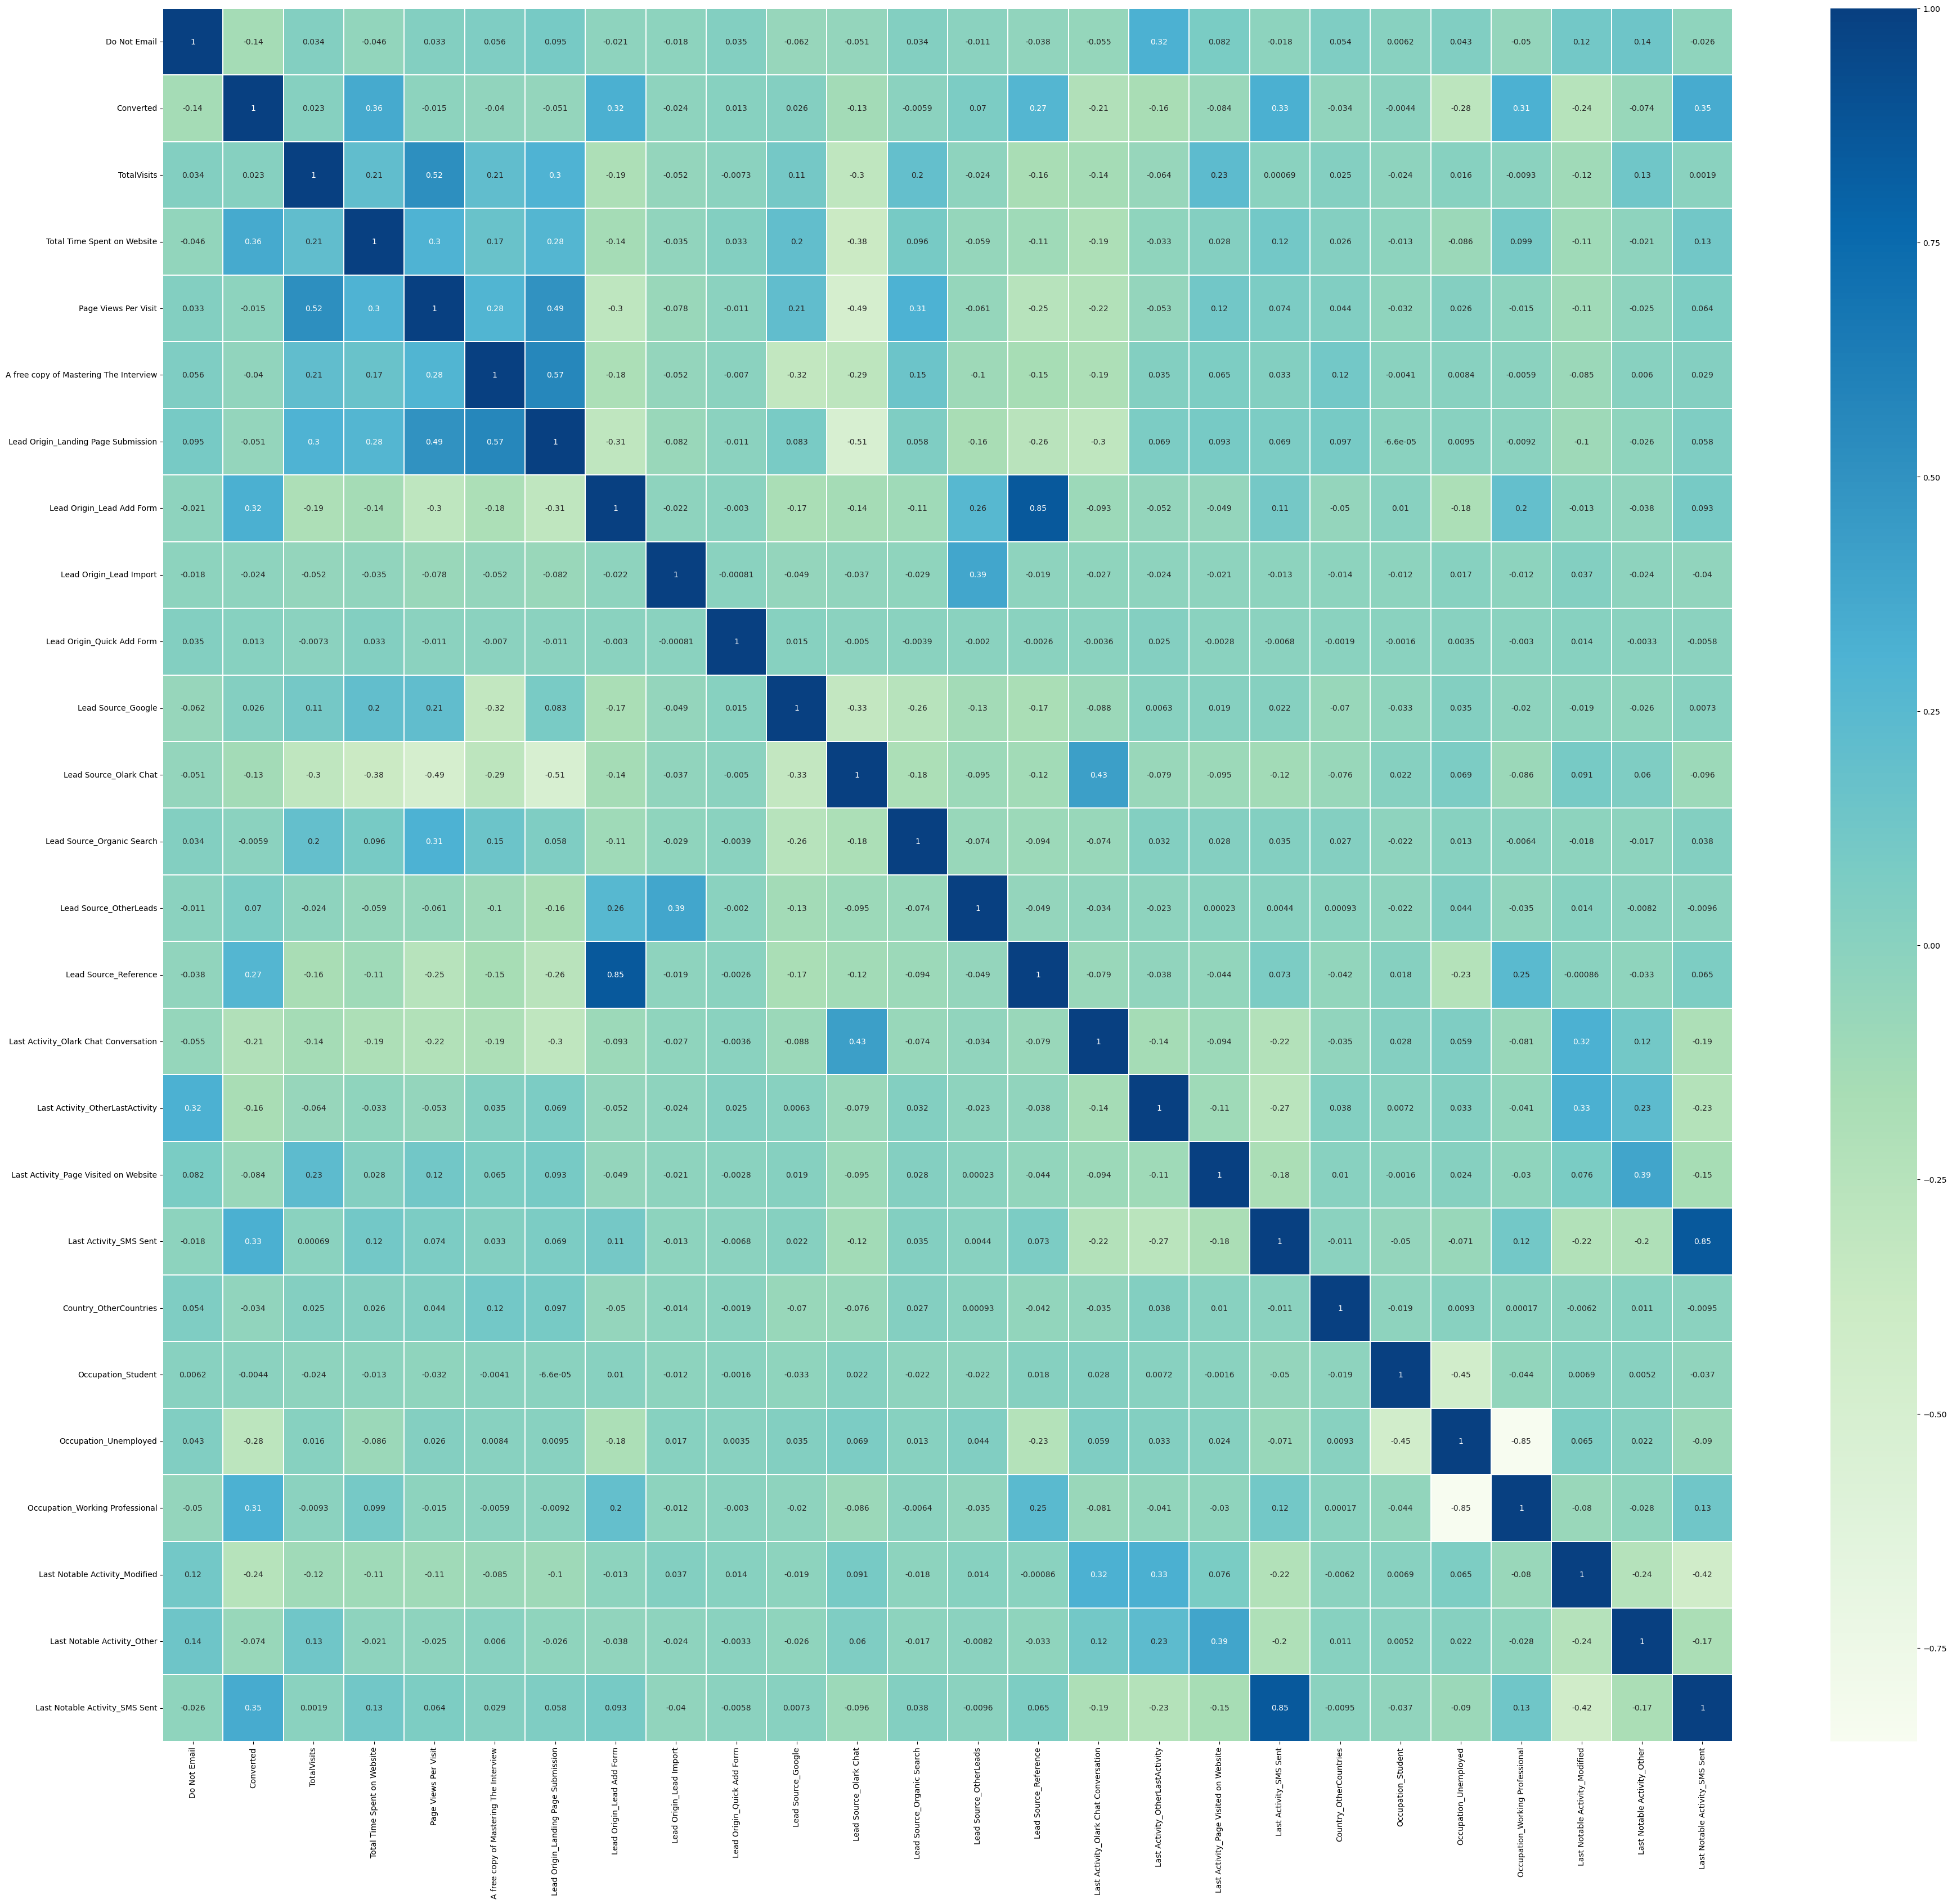

In [109]:
plt.figure(figsize = (45, 40))        
sns.heatmap(lead_df1.corr(), linewidths=0.02, cmap="GnBu", annot=True)
plt.show()

In [110]:
#dropping the variable that are showing high correlation
X_test = X_test.drop(['Last Notable Activity_SMS Sent','Lead Source_Reference'],1)

X_train = X_train.drop(['Last Notable Activity_SMS Sent','Lead Source_Reference'],1)

# Model Building

In [111]:
#using RFE we will build our model

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [113]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_OtherLeads', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_OtherLastActivity', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_OtherCountries', False, 7),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Other', False, 9)]

# Model1

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_OtherLeads',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Notable Activity_Modified'],
      dtype='object')

In [115]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Organic Search',
       'Last Activity_OtherLastActivity', 'Country_OtherCountries',
       'Last Notable Activity_Other'],
      dtype='object')

In [116]:
#variables selected by RFE
X_train_rfe = X_train[col]

In [117]:
# we will define a VIF calculator so that we can check vif at any time

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF_calculator(inp0):
    vif = pd.DataFrame()
    vif['Features'] = inp0.columns
    vif['VIF'] = [variance_inflation_factor(inp0.values, i) for i in range(inp0.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [119]:
VIF_calculator(X_train_rfe)

,Features,VIF
12,Occupation_Unemployed,3.67
6,Lead Source_Olark Chat,1.99
14,Last Notable Activity_Modified,1.86
5,Lead Source_Google,1.81
10,Last Activity_SMS Sent,1.65
8,Last Activity_Olark Chat Conversation,1.57
2,Lead Origin_Lead Add Form,1.36
13,Occupation_Working Professional,1.32
7,Lead Source_OtherLeads,1.31
1,Total Time Spent on Website,1.25


In [120]:
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_rfe)

In [121]:
#model fitting
mod_1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.2
Date:                Tue, 20 Jun 2023   Deviance:                       5416.5
Time:                        18:19:05   Pearson chi2:                 7.01e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0073      0.528     -0.014      0.989      -1.042       1.028
Do Not Email                             -0.3325      0.045     -7.416      0.000      -0.420      -0.245
Total Time Spent on Website               1.0827      0.039     27.619      0.000       1.006       1.160
Lead Origin_Lead Add Form                 3.9760      0.187     21.295      0.000       3.610       4.342
Lead Origin_Lead Import                  -0.2946      0.555     -0.531      0.596      -1.383       0.793
Lead Origin_Quick Add Form               20.2796   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                        0.3428      0.079      4.360      0.000       0.189       0.497
Lead Source_Olark Chat                    1.2922      0.109     11.896      0.000       1.079       1.505
Lead Source_OtherLeads                    0.5394      0.228      2.362      0.018       0.092       0.987
Last Activity_Olark Chat Conversation    -0.9485      0.170     -5.573      0.000      -1.282      -0.615
Last Activity_Page Visited on Website    -0.2381      0.146     -1.630      0.103      -0.524       0.048
Last Activity_SMS Sent                    1.2051      0.075     16.120      0.000       1.059       1.352
Occupation_Student                       -1.0735      0.575     -1.866      0.062      -2.201       0.054
Occupation_Unemployed                    -1.4459      0.527     -2.741      0.006      -2.480      -0.412
Occupation_Working Professional           1.3677      0.557      2.456      0.014       0.276       2.459
Last Notable Activity_Modified           -0.8966      0.080    -11.219      0.000      -1.053      -0.740
=========================================================================================================
"""

In [122]:
mod_1.params

const                                    -0.007288
Do Not Email                             -0.332464
Total Time Spent on Website               1.082696
Lead Origin_Lead Add Form                 3.975998
Lead Origin_Lead Import                  -0.294596
Lead Origin_Quick Add Form               20.279597
Lead Source_Google                        0.342825
Lead Source_Olark Chat                    1.292250
Lead Source_OtherLeads                    0.539412
Last Activity_Olark Chat Conversation    -0.948464
Last Activity_Page Visited on Website    -0.238067
Last Activity_SMS Sent                    1.205061
Occupation_Student                       -1.073482
Occupation_Unemployed                    -1.445879
Occupation_Working Professional           1.367708
Last Notable Activity_Modified           -0.896623
dtype: float64

# Model2

In [123]:
#dropping the variable with high p-value i.e value >0.05
col=col.drop('Lead Origin_Quick Add Form')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_OtherLeads', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Notable Activity_Modified'],
      dtype='object')

In [124]:
X_train_rfe = X_train[col]

In [125]:
VIF_calculator(X_train_rfe)

,Features,VIF
11,Occupation_Unemployed,3.67
5,Lead Source_Olark Chat,1.99
13,Last Notable Activity_Modified,1.86
4,Lead Source_Google,1.80
9,Last Activity_SMS Sent,1.64
7,Last Activity_Olark Chat Conversation,1.57
2,Lead Origin_Lead Add Form,1.36
12,Occupation_Working Professional,1.32
6,Lead Source_OtherLeads,1.31
1,Total Time Spent on Website,1.25


In [126]:
#model fitting
X_train_sm = sm.add_constant(X_train_rfe)
mod_2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.8
Date:                Tue, 20 Jun 2023   Deviance:                       5417.6
Time:                        18:19:05   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0086      0.528     -0.016      0.987      -1.044       1.027
Do Not Email                             -0.3295      0.045     -7.388      0.000      -0.417      -0.242
Total Time Spent on Website               1.0843      0.039     27.681      0.000       1.008       1.161
Lead Origin_Lead Add Form                 3.9765      0.187     21.301      0.000       3.611       4.342
Lead Origin_Lead Import                  -0.2938      0.555     -0.529      0.597      -1.382       0.795
Lead Source_Google                        0.3443      0.079      4.379      0.000       0.190       0.498
Lead Source_Olark Chat                    1.2943      0.109     11.917      0.000       1.081       1.507
Lead Source_OtherLeads                    0.5394      0.228      2.362      0.018       0.092       0.987
Last Activity_Olark Chat Conversation    -0.9497      0.170     -5.580      0.000      -1.283      -0.616
Last Activity_Page Visited on Website    -0.2399      0.146     -1.643      0.100      -0.526       0.046
Last Activity_SMS Sent                    1.2042      0.075     16.109      0.000       1.058       1.351
Occupation_Student                       -1.0727      0.575     -1.864      0.062      -2.201       0.055
Occupation_Unemployed                    -1.4447      0.528     -2.739      0.006      -2.479      -0.411
Occupation_Working Professional           1.3683      0.557      2.457      0.014       0.277       2.460
Last Notable Activity_Modified           -0.8953      0.080    -11.206      0.000      -1.052      -0.739
=========================================================================================================
"""

# Model3

In [127]:
#dropping another variable
col=col.drop('Lead Origin_Lead Import')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_OtherLeads',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Notable Activity_Modified'],
      dtype='object')

In [128]:
X_train_rfe = X_train[col]

In [129]:
VIF_calculator(X_train_rfe)

,Features,VIF
10,Occupation_Unemployed,3.67
4,Lead Source_Olark Chat,1.99
12,Last Notable Activity_Modified,1.86
3,Lead Source_Google,1.80
8,Last Activity_SMS Sent,1.64
6,Last Activity_Olark Chat Conversation,1.57
2,Lead Origin_Lead Add Form,1.33
11,Occupation_Working Professional,1.31
1,Total Time Spent on Website,1.25
7,Last Activity_Page Visited on Website,1.16


In [130]:
#model fitting
X_train_sm = sm.add_constant(X_train_rfe)
mod_3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
mod_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.9
Date:                Tue, 20 Jun 2023   Deviance:                       5417.9
Time:                        18:19:06   Pearson chi2:                 7.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0097      0.528     -0.018      0.985      -1.045       1.026
Do Not Email                             -0.3291      0.045     -7.379      0.000      -0.416      -0.242
Total Time Spent on Website               1.0851      0.039     27.717      0.000       1.008       1.162
Lead Origin_Lead Add Form                 3.9872      0.186     21.464      0.000       3.623       4.351
Lead Source_Google                        0.3449      0.079      4.386      0.000       0.191       0.499
Lead Source_Olark Chat                    1.2957      0.109     11.930      0.000       1.083       1.509
Lead Source_OtherLeads                    0.4909      0.210      2.341      0.019       0.080       0.902
Last Activity_Olark Chat Conversation    -0.9471      0.170     -5.566      0.000      -1.281      -0.614
Last Activity_Page Visited on Website    -0.2378      0.146     -1.629      0.103      -0.524       0.048
Last Activity_SMS Sent                    1.2042      0.075     16.110      0.000       1.058       1.351
Occupation_Student                       -1.0719      0.576     -1.862      0.063      -2.200       0.056
Occupation_Unemployed                    -1.4443      0.528     -2.737      0.006      -2.479      -0.410
Occupation_Working Professional           1.3681      0.557      2.456      0.014       0.276       2.460
Last Notable Activity_Modified           -0.8973      0.080    -11.242      0.000      -1.054      -0.741
=========================================================================================================
"""

# Model 4

In [131]:
#dropping variable
col=col.drop('Last Activity_Page Visited on Website')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_OtherLeads',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Notable Activity_Modified'],
      dtype='object')

In [132]:
X_train_rfe = X_train[col]

In [133]:
VIF_calculator(X_train_rfe)

,Features,VIF
9,Occupation_Unemployed,3.46
4,Lead Source_Olark Chat,1.98
11,Last Notable Activity_Modified,1.85
3,Lead Source_Google,1.80
7,Last Activity_SMS Sent,1.59
6,Last Activity_Olark Chat Conversation,1.55
2,Lead Origin_Lead Add Form,1.33
10,Occupation_Working Professional,1.30
1,Total Time Spent on Website,1.25
5,Lead Source_OtherLeads,1.14


In [134]:
#model4 fitting
X_train_sm = sm.add_constant(X_train_rfe)
mod_4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
mod_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.3
Date:                Tue, 20 Jun 2023   Deviance:                       5420.6
Time:                        18:19:06   Pearson chi2:                 7.01e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0652      0.524     -0.124      0.901      -1.093       0.962
Do Not Email                             -0.3317      0.045     -7.448      0.000      -0.419      -0.244
Total Time Spent on Website               1.0835      0.039     27.715      0.000       1.007       1.160
Lead Origin_Lead Add Form                 4.0018      0.186     21.553      0.000       3.638       4.366
Lead Source_Google                        0.3457      0.079      4.400      0.000       0.192       0.500
Lead Source_Olark Chat                    1.3029      0.109     11.998      0.000       1.090       1.516
Lead Source_OtherLeads                    0.4925      0.210      2.347      0.019       0.081       0.904
Last Activity_Olark Chat Conversation    -0.9214      0.169     -5.436      0.000      -1.254      -0.589
Last Activity_SMS Sent                    1.2289      0.073     16.760      0.000       1.085       1.373
Occupation_Student                       -1.0401      0.573     -1.816      0.069      -2.163       0.082
Occupation_Unemployed                    -1.4133      0.524     -2.696      0.007      -2.441      -0.386
Occupation_Working Professional           1.3995      0.554      2.527      0.012       0.314       2.485
Last Notable Activity_Modified           -0.9075      0.080    -11.408      0.000      -1.063      -0.752
=========================================================================================================
"""

# Model 5

In [135]:
#dropping variable 
col=col.drop('Occupation_Student')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_OtherLeads',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [136]:
X_train_rfe = X_train[col]

In [137]:
VIF_calculator(X_train_rfe)

,Features,VIF
8,Occupation_Unemployed,3.35
4,Lead Source_Olark Chat,1.95
10,Last Notable Activity_Modified,1.83
3,Lead Source_Google,1.78
7,Last Activity_SMS Sent,1.58
6,Last Activity_Olark Chat Conversation,1.55
2,Lead Origin_Lead Add Form,1.32
9,Occupation_Working Professional,1.29
1,Total Time Spent on Website,1.25
5,Lead Source_OtherLeads,1.14


In [138]:
#fitting model
X_train_sm = sm.add_constant(X_train_rfe)
mod_5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
mod_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.0
Date:                Tue, 20 Jun 2023   Deviance:                       5424.0
Time:                        18:19:06   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9289      0.216     -4.300      0.000      -1.352      -0.505
Do Not Email                             -0.3316      0.044     -7.456      0.000      -0.419      -0.244
Total Time Spent on Website               1.0849      0.039     27.756      0.000       1.008       1.161
Lead Origin_Lead Add Form                 4.0064      0.186     21.583      0.000       3.643       4.370
Lead Source_Google                        0.3429      0.079      4.367      0.000       0.189       0.497
Lead Source_Olark Chat                    1.2967      0.108     11.953      0.000       1.084       1.509
Lead Source_OtherLeads                    0.4870      0.210      2.319      0.020       0.075       0.898
Last Activity_Olark Chat Conversation    -0.9210      0.169     -5.436      0.000      -1.253      -0.589
Last Activity_SMS Sent                    1.2262      0.073     16.720      0.000       1.082       1.370
Occupation_Unemployed                    -0.5479      0.214     -2.561      0.010      -0.967      -0.129
Occupation_Working Professional           2.2638      0.280      8.092      0.000       1.715       2.812
Last Notable Activity_Modified           -0.9032      0.079    -11.369      0.000      -1.059      -0.748
=========================================================================================================
"""

# Model Evaluation

In [139]:
# Getting the Predicted values on the train set
y_train_pred = mod_5.predict(X_train_sm)
y_train_pred[:10]

1871    0.260406
6795    0.201996
3516    0.302917
8105    0.841590
3934    0.124870
4844    0.990796
3297    0.102307
8071    0.985953
987     0.242494
7423    0.911422
dtype: float64

In [140]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.260406  , 0.20199614, 0.30291709, 0.84159042, 0.12487044,
       0.99079603, 0.10230691, 0.9859535 , 0.24249445, 0.91142244])

In [141]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.260406,1871
1,0,0.201996,6795
2,0,0.302917,3516
3,0,0.841590,8105
4,0,0.124870,3934


In [142]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.260406,1871,0
1,0,0.201996,6795,0
2,0,0.302917,3516,0
3,0,0.841590,8105,1
4,0,0.124870,3934,0


In [143]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3550  452]
 [ 744 1722]]


In [144]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8150896722325294


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Let's see the accuracy of our logistic regression model
round((TN+TP) / float(TN+TP+FN+FP), 4)

0.8151

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6982968369829684

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.887056471764118

In [149]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11294352823588207


In [150]:
# positive predictive value 
print (TP / float(TP+FP))

0.7920883164673413


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8267349790405216


## ROC CURVE


In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

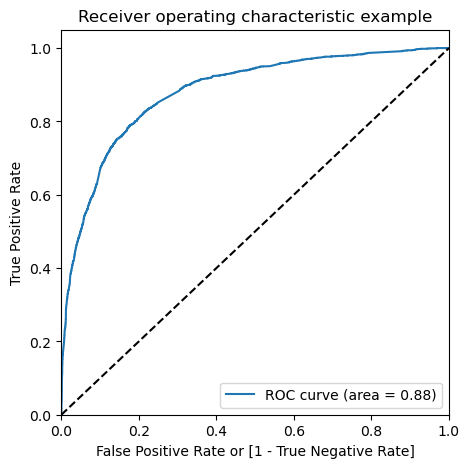

In [154]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [155]:
###Optimal cutoff


numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.260406,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.201996,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.302917,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.841590,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.124870,3934,0,1,1,0,0,0,0,0,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.590754  0.970397  0.356822
0.2   0.2  0.743506  0.915247  0.637681
0.3   0.3  0.799629  0.828873  0.781609
0.4   0.4  0.813853  0.756285  0.849325
0.5   0.5  0.815090  0.698297  0.887056
0.6   0.6  0.796846  0.594079  0.921789
0.7   0.7  0.780921  0.510543  0.947526
0.8   0.8  0.759586  0.419303  0.969265
0.9   0.9  0.711967  0.263179  0.988506


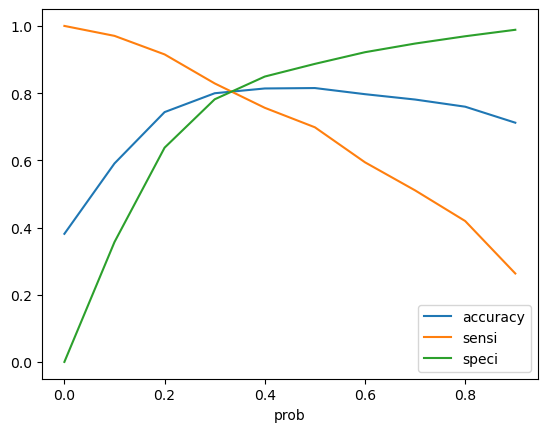

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [158]:



y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.260406,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.201996,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.302917,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.841590,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.124870,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [159]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.260406,1871,0,26
1,0,0.201996,6795,0,20
2,0,0.302917,3516,0,30
3,0,0.841590,8105,1,84
4,0,0.124870,3934,0,12


In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8070500927643784

In [161]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3264,  738],
       [ 510, 1956]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Let's see the accuracy of our logistic regression model
round((TN+TP) / float(TN+TP+FN+FP), 4)

0.8071

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7931873479318735

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.815592203898051

In [166]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.18440779610194902


In [167]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7260579064587973


In [168]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8648648648648649


In [169]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3264,  738],
       [ 510, 1956]], dtype=int64)

In [170]:
# to calculate precision score and recall score

In [171]:
from sklearn.metrics import precision_score, recall_score

In [172]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7260579064587973

In [173]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7931873479318735

In [174]:
from sklearn.metrics import precision_recall_curve

In [175]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

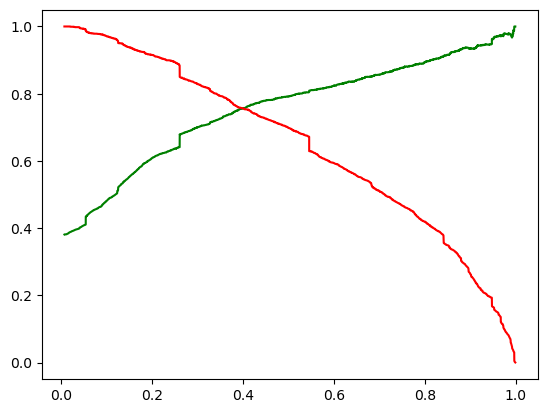

In [176]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## making prediction on the test set

In [177]:
#fitting the model on the test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_OtherLeads,Last Activity_Olark Chat Conversation,Last Activity_OtherLastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_OtherCountries,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other
4269,-0.298654,1.324501,0.933036,2.660405,-0.67689,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2376,-0.298654,-0.944318,-0.900812,-1.108316,-0.67689,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7766,-0.298654,0.473694,-0.793792,1.247135,-0.67689,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
9199,-0.298654,-0.944318,-0.900812,-1.108316,-0.67689,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4359,-0.298654,-0.944318,-0.900812,-1.108316,-0.67689,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [178]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_OtherLeads,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified
4269,-0.298654,0.933036,0,0,0,0,0,1,1,0,0
2376,-0.298654,-0.900812,1,0,0,0,0,1,1,0,0
7766,-0.298654,-0.793792,0,1,0,0,0,0,0,1,0
9199,-0.298654,-0.900812,0,0,1,0,1,0,1,0,1
4359,-0.298654,-0.900812,1,0,0,0,0,0,1,0,0


In [179]:
X_test_sm = sm.add_constant(X_test)

In [180]:
#TEST SET

y_test_pred = mod_5.predict(X_test_sm)

In [181]:
y_test_pred[:10]

4269    0.702801
2376    0.946728
7766    0.714173
9199    0.053024
4359    0.839082
9186    0.603101
1631    0.495331
8963    0.184716
8007    0.096355
5324    0.384365
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
y_pred_1.head()

,0
4269,0.702801
2376,0.946728
7766,0.714173
9199,0.053024
4359,0.839082


In [184]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [185]:
y_test_df['Prospect ID'] = y_test_df.index


y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.702801
1,1,2376,0.946728
2,1,7766,0.714173
3,0,9199,0.053024
4,1,4359,0.839082


In [186]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


In [187]:
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,4269,0.702801,1
1,1,2376,0.946728,1
2,1,7766,0.714173,1
3,0,9199,0.053024,0
4,1,4359,0.839082,1


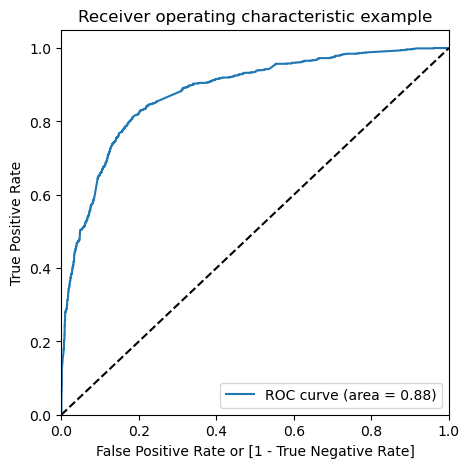

In [188]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [189]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(confusion3)

[[1392  285]
 [ 230  865]]


In [190]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [191]:
# Let's see the Accuracy of our logistic regression model
round((TN+TP) / float(TN+TP+FN+FP), 4)

0.8142

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7899543378995434

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.8300536672629696

In [194]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.16994633273703041


In [195]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7521739130434782


In [196]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8581997533908755


In [197]:
precision_score(y_pred_final['Converted'],y_pred_final['final_predicted'])

0.7521739130434782

In [198]:
recall_score(y_pred_final['Converted'],y_pred_final['final_predicted'])

0.7899543378995434

In [199]:
y_pred_final.Converted, y_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

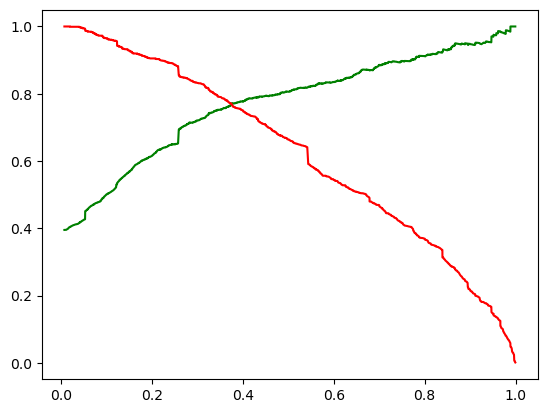

In [200]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [201]:
y_pred_final['Final_Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head(20)

,Converted,Prospect ID,Converted_Prob,final_predicted,Final_Lead_Score
0,1,4269,0.702801,1,70
1,1,2376,0.946728,1,95
2,1,7766,0.714173,1,71
3,0,9199,0.053024,0,5
4,1,4359,0.839082,1,84
5,1,9186,0.603101,1,60
6,1,1631,0.495331,1,50
7,1,8963,0.184716,0,18
8,0,8007,0.096355,0,10
9,1,5324,0.384365,1,38


In [202]:
y_pred_final.sort_values(by='Final_Lead_Score', ascending=False)

,Converted,Prospect ID,Converted_Prob,final_predicted,Final_Lead_Score
416,1,2804,0.996630,1,100
1091,1,818,0.999476,1,100
835,1,4613,0.998788,1,100
851,1,8098,0.996630,1,100
855,1,2662,0.996630,1,100
...,...,...,...,...,...
310,0,6584,0.012049,0,1
719,0,7488,0.007566,0,1
17,0,3545,0.011393,0,1
116,0,5523,0.013304,0,1
